Department of Physics, University of Pisa (AA 2023-2024)

### Multimessenger Physics Laboratory tutorial series



## Exercise 1 - Reading and manipulating CSV files
#### (M. Razzano, Feb 10, 2024)

In this exercise you will have to read and manipulate a file coming from the Exoplanet catalog

### Basic Setup
In the cell below you should import the modules that you think you will require...

In [2]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

### Open and explore  data file

The file, named catalog_exoplanets_nasa.csv, is already in the data directory. Define work, data and results directories, then open the file.
Open it and look how many lines are there, check if there are headers etc...
How many columns are there? 

In [3]:
# definisco la directory di lavoro
work_dir = os.getcwd()
print("I am in dir %s" % work_dir)

# definisco la directory principale
main_dir =os.path.dirname(work_dir)
print("Main directory is %s" % main_dir)

# definisco la directory dove ci sono i dati
data_dir = os.path.join(main_dir,"data")
print("data dir is %s" % data_dir)

# definisco la directory con i risultati
results_dir = os.path.join(main_dir,"results")
print("result dir is %s" % results_dir)

I am in dir /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/exercises
Main directory is /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01
data dir is /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/data
result dir is /home/jovyan/homework-01-data-input-output-with-python-chiaramasia01/results


In [4]:
# do' un nome al mio file
exoplanets_data_filename = "catalog_exoplanets_nasa.csv" 

 # legge il file dentro la directory
exoplanets_data_file = open(os.path.join(data_dir,exoplanets_data_filename),"r")

# Crea una lista con il contenuto, un item per ogni riga
exoplanets_lines = exoplanets_data_file.readlines()

# printo i primi tot item
print(exoplanets_lines[0:10])

# printo il numero di lines
print(f"Numero di righe =  {len(exoplanets_lines)}")

['# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu\n', '# Wed Nov 28 16:03:27 2018\n', '#\n', '# COLUMN pl_hostname:    Host Name\n', '# COLUMN pl_letter:      Planet Letter\n', '# COLUMN pl_name:        Planet Name\n', '# COLUMN pl_discmethod:  Discovery Method\n', '# COLUMN pl_pnum:        Number of Planets in System\n', '# COLUMN pl_orbper:      Orbital Period [days]\n', '# COLUMN pl_orbsmax:     Orbit Semi-Major Axis [AU])\n']
Numero di righe =  3985


In [6]:
#we can create an output list with only the lines that we want
out_list=[]

#tolgo i \n e quelle con il cancelletto

for li in range(len(exoplanets_lines)):
    line = exoplanets_lines[li].strip("\n")
    if (len(line)>0):
        #comments lines start with #
        if (line[0]!="#"):
            out_list.append(line) 
            
# Le righe con il cancelletto spiegano cosa sono le varie colonne e le unità di misura            
print("** File contains %d data lines" % len(out_list))

** File contains 3839 data lines


In [7]:
# La prima riga è l'header che contiene i nomi delle colonne

header = out_list[0]

# We can use the split function for splitting a long string. 
# Here we use the comma as separator, but one can use also other characters
column_names = header.split(",")

print("header contains %d columns" % len(column_names))
print(column_names)

header contains 143 columns
['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj', 'pl_bmassprov', 'pl_radj', 'pl_dens', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_optmag', 'st_optband', 'gaia_gmag', 'st_teff', 'st_mass', 'st_rad', 'rowupdate', 'pl_tranflag', 'pl_rvflag', 'pl_imgflag', 'pl_astflag', 'pl_omflag', 'pl_cbflag', 'pl_angsep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_eqt', 'pl_insol', 'pl_massj', 'pl_msinij', 'pl_masse', 'pl_msinie', 'pl_bmasse', 'pl_rade', 'pl_rads', 'pl_trandep', 'pl_trandur', 'pl_tranmid', 'pl_tsystemref', 'pl_imppar', 'pl_occdep', 'pl_ratdor', 'pl_ratror', 'pl_def_reflink', 'pl_disc', 'pl_disc_reflink', 'pl_locale', 'pl_facility', 'pl_telescope', 'pl_instrument', 'pl_status', 'pl_mnum', 'pl_st_npar', 'pl_st_nref', 'pl_pelink', 'pl_edelink', 'pl_publ_date', 'hd_name', 'hip_name', 'st_rah', 'st_glon', 'st

In [19]:
# Now we can create a dictionary containg one list for each column name, then we will fill it. 
# Let's use an index for the column (ci) and one for the rows (ri)

#create and init a dictionary of lists:
data_dict={}  # crea un dizionario vuoto
for ci in range(len(column_names)): # scorre su tutte le colonne
    data_dict[column_names[ci]]=[] # assegna una lista vuota a ciascun nome di colonna come chiave nel dizionario 


#we start from index 1, since we want to skip the first line containing the headers.
# Per ciascuna colonna, estrae l'elemento corrispondente dalla riga corrente data_line 
# e lo aggiunge alla lista appropriata all'interno del dizionario data_dict.
for ri in range(1, len(out_list)):
    data_line = out_list[ri].split(",") # splits a string into a list, out_list sono i dati dei pianeti messi a posto senza header 

    # Fill in the empty spots with '0'
    for i in range(len(data_line)):
        if data_line[i] == '':
            data_line[i] = '0'

    # Join the elements back together with commas
    items_filled = ','.join(data_line)

    for ci in range(len(column_names)):
        data_dict[column_names[ci]].append(data_line[ci])


In [20]:
#print for example the names and mass of planets
#look at mass dict_key with the command: "data_dict.keys()"

data_dict.keys()
#print(data_dict["pl_discmethod"])

dict_keys(['rowid', 'pl_hostname', 'pl_letter', 'pl_name', 'pl_discmethod', 'pl_pnum', 'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj', 'pl_bmassprov', 'pl_radj', 'pl_dens', 'pl_ttvflag', 'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str', 'dec', 'st_dist', 'st_optmag', 'st_optband', 'gaia_gmag', 'st_teff', 'st_mass', 'st_rad', 'rowupdate', 'pl_tranflag', 'pl_rvflag', 'pl_imgflag', 'pl_astflag', 'pl_omflag', 'pl_cbflag', 'pl_angsep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_eqt', 'pl_insol', 'pl_massj', 'pl_msinij', 'pl_masse', 'pl_msinie', 'pl_bmasse', 'pl_rade', 'pl_rads', 'pl_trandep', 'pl_trandur', 'pl_tranmid', 'pl_tsystemref', 'pl_imppar', 'pl_occdep', 'pl_ratdor', 'pl_ratror', 'pl_def_reflink', 'pl_disc', 'pl_disc_reflink', 'pl_locale', 'pl_facility', 'pl_telescope', 'pl_instrument', 'pl_status', 'pl_mnum', 'pl_st_npar', 'pl_st_nref', 'pl_pelink', 'pl_edelink', 'pl_publ_date', 'hd_name', 'hip_name', 'st_rah', 'st_glon', 'st_glat', 'st_elon',

### Save in a list of arrays

Read the data file and for each column create a numpy array. 
Some quantities are not expressed in SI Units. Can you convert them, e.g. from AU to m, or from years to seconds?

In [53]:
# faccio un ciclo che scorre sui nomi delle colonne
# nota ci sono dei buchi, riempili prima di convertire

for ii in column_names:
        data_dict[ii] = np.asarray(data_dict[ii]) # converto in array di numpy
print(data_dict['st_mass'].dtype) # ottengo un array di stringhe, per plottarlo devo convertirlo in un array di numeri

<U5


### Do some plotting

Choose few quantities and make a scatter plot and a histogram.

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]


Text(0.5, 1.0, 'Plot Massa-Raggio')

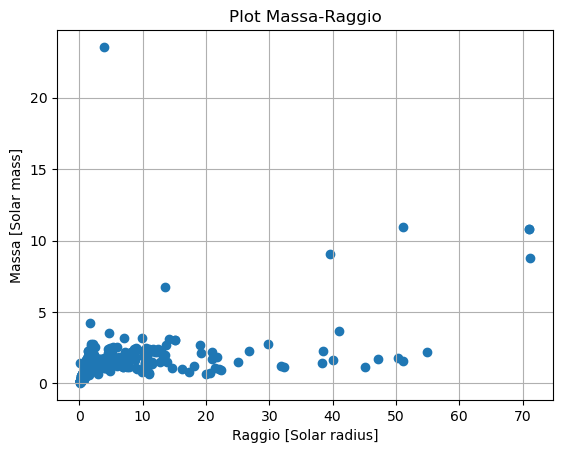

In [81]:
# Scatter plot

data_dict['st_mass'] = np.asarray(data_dict['st_mass'])
data_dict['st_rad'] = np.asarray(data_dict['st_rad'])

massa = data_dict['st_mass'].astype(float)
raggio = data_dict['st_rad'].astype(float)

# I buchi che ho riempito con gli zeri mi sfalsano il grafico, li tolgo

ii_m = np.array(massa!=0)
print(ii_m)
ii_r = np.array(raggio!=0)
print(ii_r)

massa = massa[np.logical_and(ii_r, ii_m)]
raggio = raggio[np.logical_and(ii_r, ii_m)]

        
fig = plt.figure()
plt.grid(True)
plt.scatter(raggio, massa)
plt.xlabel('Raggio [Solar radius]')
plt.ylabel('Massa [Solar mass]')
plt.title('Plot Massa-Raggio')

Text(0, 0.5, 'Occorrenze')

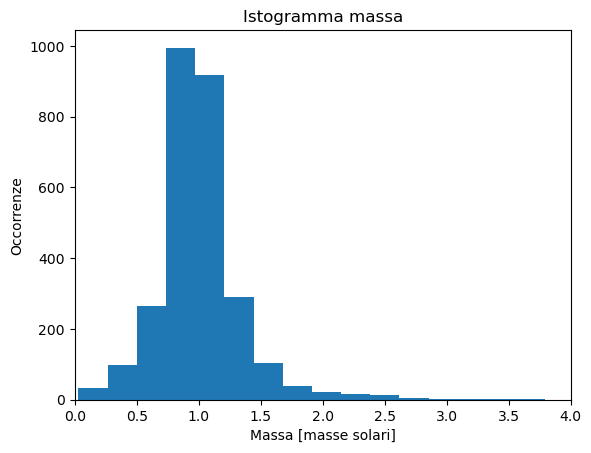

In [82]:
# Istogramma

hist = plt.figure()
plt.hist(massa, bins=100)
plt.xlim([0,4])
plt.title('Istogramma massa')
plt.xlabel('Massa [masse solari]')
plt.ylabel('Occorrenze')

### Save in an output file

Are you able to save the data in a more readable file? I.e. a file with no comments and just the headers. Is the data in SI format?

In [ ]:
fig.savefig(os.path.join(results_dir, 'plot_ex.pdf'), bbox_inches='tight') 
hist.savefig(os.path.join(results_dir, 'hist.pdf'), bbox_inches='tight') 

### Final steps
Congratulations! Don't forget to save your work to Github (using git commit + git push)